**Name:** Yidu WU

**EID:** yiduwu2

**Kaggle Team Name:** Yidu WU

# CS5489 - Assignment 1 - Tweet Sentiment Analysis

## Goal
In this assignment, the task is predict the sentiment of Tweets about four technology companies, Apple, Microsoft, Google, and Twitter. Here are some examples of tweets with different sentiments:
  - **positive**: _"http://t.co/QV4m1Un9 Forget the phone.. Nice UI. Liking the Scroll Feature #android #google #nexus"_
  - **negative**: _"Have never had such poor customer service at @Apple before! What happened? (@ Apple Store w/ 2 others) http://t.co/GKlXMUi6"_
  - **neutral**: _"The lock screen now has facial recognition capability! #Google #Android #ICS"_.

Your goal is to train a classifier to predict whether a tweet is positive, neutral, or negative sentiment.


## Methodology
You need to train classifiers using the training data, and then predict on the test data. You are free to choose the feature extraction method and classifier algorithm.  You are free to use methods that were not introduced in class.  You should probably do cross-validation to select a good parameters.


## Evaluation on Kaggle

You need to submit your test predictions to Kaggle for evaluation.  50% of the test data will be used to show your ranking on the live leaderboard.  After the assignment deadline, the remaining 50% will be used to calculate your final ranking. Also the top-ranked entries will be asked to give a short 5 minute presentation on what they did.

To submit to Kaggle you need to create an account, and use the competition invitation that will be posted on Canvas.

**Note:** You can only submit 2 times per day to Kaggle!

## What to hand in
You need to turn in the following things:

1. This ipynb file with your source code and documentation. _**You should write about all the various attempts that you make to find a good solution.**_ You may also submit python scripts as source code, but your documentation must be in the ipynb file.
2. Your final submission file to Kaggle.
3. The ipynb file `Assignment1-Final.ipynb`, which contains the code that generates the final submission file that you submit to Kaggle.  **This code will be used to verify that your Kaggle submission is reproducible.**

Files should be uploaded to Assignment 1 on Canvas.

## Grading
The marks of the assignment are distributed as follows:
- 45% - Results using various classifiers and feature representations.
- 30% - Trying out feature representations (e.g. adding additional features) or classifiers not used in the tutorials/lectures.
- 20% - Quality of the written report.  More points for insightful observations and analysis.
- 5% - Final ranking on the Kaggle test data (private leaderboard). If a submission cannot be reproduced by the submitted code, it will not receive marks for ranking.
- **Late Penalty:** 25 marks will be subtracted for each day late.

**Note:** you should start early! Some classifiers may take a while to train.


## Kaggle Notebooks

If you like, you can use Kaggle notebooks to run your code. Note that you still need to submit your code to Canvas for grading.
<hr>

# Load the Data

The training data is in the text file `sanders_tweets_train.txt`.  This CSV file contains the  tweet, labels, and topics. The class labels are: `"positive"`, `"neutral"`, and `"negative"`. The training data also includes the corresponding tweet topics: `"apple"`, `"microsoft"`, `"google"`, and `"twitter"`.

The testing data is in the text file `sanders_tweets_test.txt`, and only contains the tweets.  The topics are not included, since they are not known at test time.

To submit to Kaggle, you need to generate a Kaggle submission files, which is CSV file with the following format: 

<pre>
Id,Prediction
1,neutral
2,neutral
3,positive
4,negative
...
</pre>

Here are two helpful functions for reading the text data and writing the Kaggle submission file.

In [2]:
%matplotlib inline
import IPython.core.display         
# setup output image format (Chrome works best)
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats
import csv
random.seed(100)

In [3]:
def read_text_data(fname):
    txtdata = []
    classes = []
    topics  = []
    with open(fname, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in reader:
            # get the text
            txtdata.append(row[0])
            # get the class (convert to integer)
            if len(row)>1:
                classes.append(row[1])
                topics.append(row[2])
    
    if (len(classes)>0) and (len(txtdata) != len(classes)):        
        raise Exception("mismatched length!")
    
    return (txtdata, classes, topics)

def write_csv_kaggle_sub(fname, Y):
    # fname = file name
    # Y is a list/array with class entries
    
    # header
    tmp = [['Id', 'Prediction']]
    
    # add ID numbers for each Y
    for (i,y) in enumerate(Y):
        tmp2 = [(i+1), y]
        tmp.append(tmp2)
        
    # write CSV file
    with open(fname, 'w') as f:
        writer = csv.writer(f)
        writer.writerows(tmp)

The below code will load the training and test sets.

In [4]:
# load the data
# (if using Kaggle notebooks you need to include the directory path: /kaggle/input/cs5489-2020b-assignment-1/)
(traintxt, trainY, traintopic) = read_text_data("sanders_tweets_train.txt")
(testtxt, _, _)                = read_text_data("sanders_tweets_test.txt")

print(len(traintxt))
print(len(testtxt))

2396
1028


In [5]:
classnames = unique(trainY)
print(classnames)

['negative' 'neutral' 'positive']


Here is an example to write a csv file with predictions on the test set.  These are random predictions.

In [6]:
# write your predictions on the test set
i = random.randint(len(classnames), size=len(testtxt))
predY = classnames[i]
write_csv_kaggle_sub("my_submission.csv", predY)

Look at the data:

In [7]:
print(trainY[0])
print(traintopic[0])
print(traintxt[0])

positive
google
http://t.co/QV4m1Un9 Forget the phone.. Nice UI. Liking the Scroll Feature #android #google #nexus


# YOUR CODE and DOCUMENTATION HERE

At first, I selected some models to encapsulate as functions for later calls

Here I selected five models: 

    Bernoulli Naive Bayes model
    Multinomial Naive Bayes model
    Logistic Regression model
    SVM with Linear kernel
    SVM with RBF kernel

In [8]:
# Bernoulli Naive Bayes model
def Bernoulli(trainXdata,testXdata,trainYdata,testYdata):
    cntvect_B = feature_extraction.text.CountVectorizer(stop_words='english', max_features=500)
    cntvect_B.fit(trainXdata)
    trainX_B = cntvect_B.transform(trainXdata)
    testX_B  = cntvect_B.transform(testXdata)
    bmodel_B = naive_bayes.BernoulliNB(alpha=0.01)
    bmodel_B.fit(trainX_B, trainYdata)
    predY_B = bmodel_B.predict(testX_B)
    acc_B = metrics.accuracy_score(testYdata, predY_B)
    return acc_B

In [9]:
# Multinomial Naive Bayes model
def Multinomial(trainXdata,testXdata,trainYdata,testYdata):
    cntvect_M = feature_extraction.text.CountVectorizer(stop_words='english', max_features=500)
    cntvect_M.fit(trainXdata)
    trainX_M = cntvect_M.transform(trainXdata)
    testX_M  = cntvect_M.transform(testXdata)
    tf_trans_M = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
    trainXtf_M = tf_trans_M.fit_transform(trainX_M)
    testXtf_M = tf_trans_M.transform(testX_M)
    mmodel_tf_M = naive_bayes.MultinomialNB(alpha=0.01)
    mmodel_tf_M.fit(trainXtf_M, trainYdata)
    predYtf_M = mmodel_tf_M.predict(testXtf_M)
    acc_M = metrics.accuracy_score(testYdata, predYtf_M)
    return acc_M

In [10]:
# Logistic Regression model
def LogisticR(trainXdata,testXdata,trainYdata,testYdata):
    cntvect_LR = feature_extraction.text.CountVectorizer(stop_words='english', max_features=500)
    cntvect_LR.fit(trainXdata)
    trainX_LR = cntvect_LR.transform(trainXdata)
    testX_LR  = cntvect_LR.transform(testXdata)
    mlogreg_LR = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1)
    mlogreg_LR.fit(trainX_LR, trainYdata)
    predY_LR = mlogreg_LR.predict(testX_LR)
    acc_LR = metrics.accuracy_score(testYdata, predY_LR)
    return acc_LR

In [11]:
# SVM with Linear kernel
def SvmLinear(trainXdata,testXdata,trainYdata,testYdata):
    cntvect_SvmL = feature_extraction.text.CountVectorizer(stop_words='english', max_features=500)
    cntvect_SvmL.fit(trainXdata)
    trainX_SvmL = cntvect_SvmL.transform(trainXdata)
    testX_SvmL  = cntvect_SvmL.transform(testXdata)
    paramgrid_SvmL = {'C': logspace(-2,2,10)}
    svmcv_SvmL = model_selection.GridSearchCV(svm.SVC(kernel='linear'), paramgrid_SvmL, cv=5,
                                     n_jobs=-1, verbose=True)
    svmcv_SvmL.fit(trainX_SvmL, trainYdata);
    predY_SvmL = svmcv_SvmL.predict(testX_SvmL)
    acc_SvmL = metrics.accuracy_score(testYdata, predY_SvmL)
    return acc_SvmL

In [12]:
# SVM with RBF kernel
def SvmRBF(trainXdata,testXdata,trainYdata,testYdata):
    cntvect_SvmR = feature_extraction.text.CountVectorizer(stop_words='english', max_features=500)
    cntvect_SvmR.fit(trainXdata)
    trainX_SvmR = cntvect_SvmR.transform(trainXdata)
    testX_SvmR  = cntvect_SvmR.transform(testXdata)
    paramgrid_SvmR = {'C': logspace(-2,2,10), 'gamma': logspace(-2,2,10) }
    svmcv_SvmR = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid_SvmR, cv=5,
                                    n_jobs=-1, verbose=True)
    svmcv_SvmR.fit(trainX_SvmR, trainYdata);
    predY_SvmR = svmcv_SvmR.predict(testX_SvmR)
    acc_SvmR = metrics.accuracy_score(testYdata, predY_SvmR)
    return acc_SvmR

Then, I take the K-fold cross-validation to observe the performance of the five models on the raw data.

K-fold cross-validation randomly divides data set A into K packages, one of which is used as the test set each time, and the remaining K-1 packages are used as the training set for training

K-fold Cross-validation makes good use of limited data

In [13]:
# K-fold cross-validation
# Here we use 10-fold cross-validation to choose the model which performs better
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
Acc_B = []
Acc_M = []
Acc_LR = []
Acc_SvmL = []
Acc_SvmR = []
for train_index, test_index in kf.split(traintxt):
    #print('train_index', train_index, 'test_index', test_index)
    trainX_data = traintxt[train_index[0]:train_index[len(train_index)-1]]
    testX_data= traintxt[test_index[0]:test_index[len(test_index)-1]]
    trainY_data = trainY[train_index[0]:train_index[len(train_index)-1]]
    testY_data = trainY[test_index[0]:test_index[len(test_index)-1]]
    Acc_B.append(Bernoulli(trainX_data,testX_data,trainY_data,testY_data))
    Acc_M.append(Multinomial(trainX_data,testX_data,trainY_data,testY_data))
    Acc_LR.append(LogisticR(trainX_data,testX_data,trainY_data,testY_data))
    Acc_SvmL.append(SvmLinear(trainX_data,testX_data,trainY_data,testY_data))
    Acc_SvmR.append(SvmRBF(trainX_data,testX_data,trainY_data,testY_data))

# print each models' test results
print("Bernoulli")
print(Acc_B)
print("Multinomial")
print(Acc_M)
print("LogisticR")
print(Acc_LR)
print("SvmLinear")
print(Acc_SvmL)
print("SvmRBF")
print(Acc_SvmR)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    3.9s remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   14.0s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   48.5s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   59.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   58.3s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   58.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.0s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   57.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   59.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    1.0s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   59.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.9s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   12.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   58.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.8s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.1s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.8s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.4s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   47.3s finished


Bernoulli
[0.6778242677824268, 0.7364016736401674, 0.7489539748953975, 0.799163179916318, 0.7531380753138075, 0.7531380753138075, 0.7941176470588235, 0.7352941176470589, 0.773109243697479, 0.6302521008403361]
Multinomial
[0.7196652719665272, 0.694560669456067, 0.7154811715481172, 0.7196652719665272, 0.7112970711297071, 0.7071129707112971, 0.7563025210084033, 0.7058823529411765, 0.7058823529411765, 0.6050420168067226]
LogisticR
[0.7322175732217573, 0.7782426778242678, 0.7949790794979079, 0.8242677824267782, 0.799163179916318, 0.803347280334728, 0.8109243697478992, 0.7857142857142857, 0.8109243697478992, 0.634453781512605]
SvmLinear
[0.694560669456067, 0.7698744769874477, 0.7740585774058577, 0.8200836820083682, 0.803347280334728, 0.8158995815899581, 0.8235294117647058, 0.7857142857142857, 0.8235294117647058, 0.6176470588235294]
SvmRBF
[0.7238493723849372, 0.9037656903765691, 0.9288702928870293, 0.9079497907949791, 0.9163179916317992, 0.9414225941422594, 0.9243697478991597, 0.899159663865

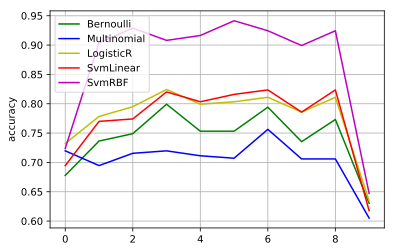

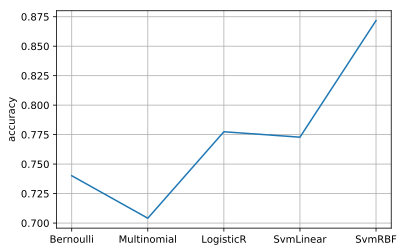

In [14]:
# Show the performance of each models
x = arange(0,10,1)
plt.plot(x, Acc_B, label='Bernoulli',color='g')
plt.plot(x, Acc_M, label='Multinomial',color='b')
plt.plot(x, Acc_LR, label='LogisticR',color='y')
plt.plot(x, Acc_SvmL, label='SvmLinear',color='r')
plt.plot(x, Acc_SvmR, label='SvmRBF',color='m')
plt.grid(True)
plt.legend()
plt.ylabel('accuracy')
plt.show()

# Calculate and plot the average of each models
avg_B = sum(Acc_B) / 10
avg_M = sum(Acc_M) / 10
avg_LR = sum(Acc_LR) / 10
avg_SvmL = sum(Acc_SvmL) / 10
avg_SvmR = sum(Acc_SvmR) / 10
x = ['Bernoulli','Multinomial','LogisticR','SvmLinear','SvmRBF']
y = [avg_B,avg_M,avg_LR,avg_SvmL,avg_SvmR]
plt.plot(x,y)
plt.grid(True)
plt.ylabel('accuracy')
plt.show()

As can be seen from the above figure, the performance trends of the five models in the K-fold are similar

However, the test accuracy of Model SVM with rfb kerneal is far ahead of other models

I think due to the linearly indivisible case, the liner model maybe not a good fit.

So why SVM models performs better than others?

I think because SVM allows decision boundaries to be complex, even if the data has only a few features. It performs well on both low-dimensional data and high-dimensional data (that is, few features and many features).
However, running SVM on data with up to 10,000 samples may perform well, but with data volumes of 100,000 or more, it can be challenging in terms of running time and memory usage

SO I make a summary about the svm model:

Advantages:
First, it can solve machine learning problems in the case of small samples.
Second, it can improve the generalization performance.
Three, can solve the problem of high dimension.
Fourth, it can solve nonlinear problems.
Fifthly, the problem of neural network structure selection and local minimum can be avoided.

Disadvantages:
large consumption in terms of running time and memory usage

In [13]:
# Then, I need to analysis the vocabulary
def showVocab(vocab, counts=None):
    "print out the vocabulary. if counts specified, then only print the words w/ non-zero entries"
    allwords = list(vocab.keys())
    allwords.sort()  # sort vocabulary by index
    wordlist = []
    for word in allwords:
        ind = vocab[word]
        if (counts is None):
            mystr = "{:3d}. {}".format(ind, word)
        elif (counts[0,ind]>0):
            mystr = "{:3d}. ({:0.4f}) {}".format(ind, counts[0,ind], word)
        else:
            continue  # skip it
        wordlist.append(mystr)

    # print 2 columns
    it = iter(wordlist)
    for i in it:
        print('{:<30}{}'.format(i, next(it)))
        
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=100)
cntvect.fit(traintxt)
trainX = cntvect.transform(traintxt)
testX  = cntvect.transform(testtxt)

# Show the vocabulary
showVocab(cntvect.vocabulary_)

#I find that there are many unrelated words need to be reconsider

  0. 4s                         1. android
  2. app                        3. apple
  4. apps                       5. available
  6. awesome                    7. ballmer
  8. best                       9. better
 10. check                     11. cloud
 12. cream                     13. data
 14. day                       15. days
 16. dear                      17. devices
 18. dhilipsiva                19. did
 20. don                       21. facebook
 22. fail                      23. followers
 24. free                      25. galaxy
 26. galaxynexus               27. genius
 28. going                     29. good
 30. google                    31. got
 32. great                     33. gt
 34. hours                     35. http
 36. ice                       37. icecreamsandwich
 38. icloud                    39. ics
 40. ios                       41. ios5
 42. ipad                      43. iphone
 44. iphone4s                  45. ipod
 46. jobs                      47. just


Here I need to process the raw data to make it clean

I need to remove the Twitter logo @user which are all user information on Twitter and are not helpful for sentiment analysis.

Then ,remove the URL which are useless.

Then, remove punctuation, numbers, and special characters which are meaningless.

Then, remove short words. My choice is to get rid of anything less than or equal to three,like HMM, OH ,day and so on are useless.


In [14]:
# Delete unrelated words by the Regular expression
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)    
    return input_txt  

def replace_all_blank(value):
    result = re.sub('\W+', ' ', value).replace("_", '')
    return result

#delete some special words
print(traintxt[0:20])
print("")
print("process step1")
traintxtTemp = []
for i in range(len(traintxt)):
    t = remove_pattern(traintxt[i], "#[\w]*")            #Delete #
    t = remove_pattern(t, "@[\w]*")                      #Delete @ 
    t = remove_pattern(t, r'http://[a-zA-Z0-9.?/&=:]*')  #Delete Url
    t = replace_all_blank(t)                             
    t = remove_pattern(t, r"[0-9]+")                     #Delete number
    traintxtTemp.append(t)
print(traintxtTemp[0:20])
print("")
print("process step2")

#Delete words which length less than 4
traintxtTemp2 = []
f = lambda x: ' '.join([w for w in x.split() if len(w)>3])
traintxtTemp2 = list(map(f, traintxtTemp))
print(traintxtTemp2[0:20])

['http://t.co/QV4m1Un9 Forget the phone.. Nice UI. Liking the Scroll Feature #android #google #nexus', 'I hate when my phne do what it want on #twitter', '…and only the first 23 images in my Photo Roll made it over? Seriously, @apple, how did you fuck this up so much?', 'The lock screen now has facial recognition capability! #Google #Android #ICS', '#TeamGoogleNexus RT @B__Y #Google + #Samsung = Perfect #Icecream sandwich #GalaxyNexus', "RT @FierceWireless: #Microsoft's Ballmer promises #Nokia Windows phones next week, slams #Android.  http://t.co/OH8Btu2e #WP7 #Window...", '@Slater_Boy Needs to take his ass to sleep... Its grown folks hour on #twitter', 'RT @bmann Awesome! @TommyLee is moving to #Vancouver as Dev Evangelist for #Microsoft - we finally get a local', 'Have never had such poor customer service at @Apple before! What happened? (@ Apple Store w/ 2 others) http://t.co/GKlXMUi6', 'Thank you @apple for your innovations. Exhibit A: Guy playing with Facetime instead of watching

Now I get the cleaner data than before, but it's not over.

I need to extract the stem:

Stem extraction is the process of removing suffixes from words based on rules. For example, play, player, played, plays, and playing are all variations of play.

Stem extraction can further reduce the noise of the dataset.

In [15]:
# we need to install nltk to use the Stemming function
# use Stemming to extract the stem
import nltk
from nltk.stem.porter import PorterStemmer  
porter_stemmer = PorterStemmer()

print(traintxtTemp2[0:20])
print("")
print("process step3")
traintxtTemp3 = []
f = lambda x: x.split()
traintxtTemp3 = list(map(f, traintxtTemp2))
print(traintxtTemp3[0:20])
print("")

print("process step4")
traintxtNew = []
f=lambda x: [porter_stemmer.stem(i) for i in x]
traintxtNew = list(map(f, traintxtTemp3))
print(traintxtNew[0:20])

['Forget phone Nice Liking Scroll Feature', 'hate when phne what want', 'only first images Photo Roll made over Seriously fuck this much', 'lock screen facial recognition capability', 'Perfect sandwich', 'Ballmer promises Windows phones next week slams', 'Needs take sleep grown folks hour', 'Awesome moving Evangelist finally local', 'Have never such poor customer service before What happened Apple Store others', 'Thank your innovations Exhibit playing with Facetime instead watching game sports', 'cannot wait phone', 'Child View', 'Ways Business', 'Google updates Nexus site with Galaxy Nexus details', 'Thank giving tweets that have been tweeted past days', 'Funny Google ranked', 'iPhone camera SONY', 'Yahoo Profit Drops Cent', 'Soon Getting ready party', 'need unfollow some these wannabe real thugs have Hell']

process step3
[['Forget', 'phone', 'Nice', 'Liking', 'Scroll', 'Feature'], ['hate', 'when', 'phne', 'what', 'want'], ['only', 'first', 'images', 'Photo', 'Roll', 'made', 'over', 

In [ ]:
# To combine the words, I installed mosestokenizer 
pip install mosestokenizer

In [16]:
# use mosestokenizer to combine the words
from mosestokenizer import MosesDetokenizer
detokenizer = MosesDetokenizer()
for i in range(len(traintxtNew)):
    traintxtNew[i] = detokenizer(traintxtNew[i])
    
print("process step5")
print(traintxtNew[0:20])

process step5
['forget phone nice like scroll featur', 'hate when phne what want', 'onli first imag photo roll made over serious fuck thi much', 'lock screen facial recognit capabl', 'perfect sandwich', 'ballmer promis window phone next week slam', 'need take sleep grown folk hour', 'awesom move evangelist final local', 'have never such poor custom servic befor what happen appl store other', 'thank your innov exhibit play with facetim instead watch game sport', 'cannot wait phone', 'child view', 'way busi', 'googl updat nexu site with galaxi nexu detail', 'thank give tweet that have been tweet past day', 'funni googl rank', 'iphon camera soni', 'yahoo profit drop cent', 'soon get readi parti', 'need unfollow some these wannab real thug have hell']


Now I've finished preprocessing the data, and I need to take the K-fold cross-validation to observe the performance of the five models on the processed data.

And the model which have best performance will be choosed to do the future analysis.


In [19]:
# After processed the data, I use the K-fold cross-validation the compare each models again
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
Acc_B = []
Acc_M = []
Acc_LR = []
Acc_SvmL = []
Acc_SvmR = []
for train_index, test_index in kf.split(traintxtNew):
    trainX_data = traintxtNew[train_index[0]:train_index[len(train_index)-1]]
    testX_data= traintxtNew[test_index[0]:test_index[len(test_index)-1]]
    trainY_data = trainY[train_index[0]:train_index[len(train_index)-1]]
    testY_data = trainY[test_index[0]:test_index[len(test_index)-1]]
    Acc_B.append(Bernoulli(trainX_data,testX_data,trainY_data,testY_data))
    Acc_M.append(Multinomial(trainX_data,testX_data,trainY_data,testY_data))
    Acc_LR.append(LogisticR(trainX_data,testX_data,trainY_data,testY_data))
    Acc_SvmL.append(SvmLinear(trainX_data,testX_data,trainY_data,testY_data))
    Acc_SvmR.append(SvmRBF(trainX_data,testX_data,trainY_data,testY_data))

print("Bernoulli")
print(Acc_B)
print("Multinomial")
print(Acc_M)
print("LogisticR")
print(Acc_LR)
print("SvmLinear")
print(Acc_SvmL)
print("SvmRBF")
print(Acc_SvmR)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.9s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   34.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.4s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.9s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   42.4s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.7s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   41.8s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.5s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   42.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   41.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.7s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   42.2s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.6s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.3s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   41.7s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.5s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   42.1s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.5s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   41.9s finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  50 | elapsed:    0.4s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.2s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   33.5s finished


Bernoulli
[0.6694560669456067, 0.803347280334728, 0.8284518828451883, 0.8200836820083682, 0.7866108786610879, 0.8117154811715481, 0.7983193277310925, 0.7647058823529411, 0.8235294117647058, 0.6890756302521008]
Multinomial
[0.7280334728033473, 0.694560669456067, 0.7489539748953975, 0.7322175732217573, 0.7615062761506276, 0.7280334728033473, 0.7647058823529411, 0.7521008403361344, 0.7058823529411765, 0.6176470588235294]
LogisticR
[0.7322175732217573, 0.799163179916318, 0.8200836820083682, 0.8493723849372385, 0.8075313807531381, 0.8158995815899581, 0.8487394957983193, 0.773109243697479, 0.819327731092437, 0.6470588235294118]
SvmLinear
[0.7154811715481172, 0.799163179916318, 0.8410041841004184, 0.8284518828451883, 0.8242677824267782, 0.8200836820083682, 0.8613445378151261, 0.8025210084033614, 0.8403361344537815, 0.6050420168067226]
SvmRBF
[0.7531380753138075, 0.8577405857740585, 0.9037656903765691, 0.9079497907949791, 0.8744769874476988, 0.9121338912133892, 0.8949579831932774, 0.8613445378

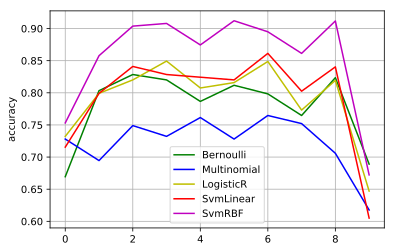

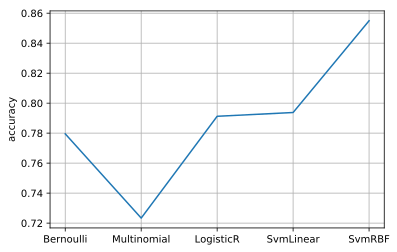

In [20]:
# Show the performance of each models
x = arange(0,10,1)
plt.plot(x, Acc_B, label='Bernoulli',color='g')
plt.plot(x, Acc_M, label='Multinomial',color='b')
plt.plot(x, Acc_LR, label='LogisticR',color='y')
plt.plot(x, Acc_SvmL, label='SvmLinear',color='r')
plt.plot(x, Acc_SvmR, label='SvmRBF',color='m')
plt.grid(True)
plt.legend()
plt.ylabel('accuracy')
plt.show()

# Calculate and plot the average of each models
avg_B = sum(Acc_B) / 10
avg_M = sum(Acc_M) / 10
avg_LR = sum(Acc_LR) / 10
avg_SvmL = sum(Acc_SvmL) / 10
avg_SvmR = sum(Acc_SvmR) / 10
x = ['Bernoulli','Multinomial','LogisticR','SvmLinear','SvmRBF']
y = [avg_B,avg_M,avg_LR,avg_SvmL,avg_SvmR]
plt.plot(x,y)
plt.grid(True)
plt.ylabel('accuracy')
plt.show()

I find that the SVM with RBF kernel model still performs the best based on the processed data.

It suggest that the nonlinear performance of SVM model on small data sets is really good.

But on big data sets, It maybe performs not very well and will consume more time and memory.


In [17]:
# So I decide to choose the SVM with RBF kernel model to do the future analysis
# Firstly, split the traintxt into traindata and testdata
trainX_data, testX_data, trainY_data, testY_data = \
  model_selection.train_test_split(traintxtNew, trainY, 
  train_size=0.80, test_size=0.20, random_state=5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.0min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   27.2s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.0s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.9s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   30.1s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   30.6s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.1s finished


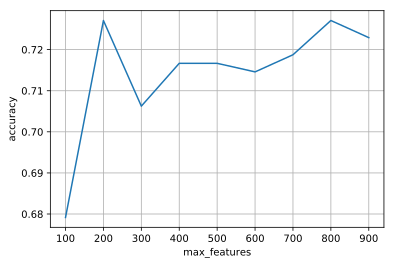

In [22]:
# Then, We need to choose the better value of max_features
x = range(100,1000,100)
y = []
for item in x:
    cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=item)
    cntvect.fit(trainX_data)
    trainX = cntvect.transform(trainX_data)
    testX  = cntvect.transform(testX_data)
    paramgrid = {'C': logspace(-2,2,10), 'gamma': logspace(-2,2,10) }
    svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=5,
                                    n_jobs=-1, verbose=True)
    svmcv.fit(trainX, trainY_data);
    predY = svmcv.predict(testX)
    acc = metrics.accuracy_score(testY_data, predY)
    y.append(acc)

plt.plot(x, y)
plt.grid(True)
plt.ylabel('accuracy')
plt.xlabel('max_features')
plt.show()

The overall accuracy increases with the increase of MAX_features

I think We can specified the MAX_features or not

In [23]:
# Then we choose max_features = 200
# Then we need to choose the parameter cv
# use cv =10
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=200)
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
paramgrid = {'C': logspace(-2,2,10), 'gamma': logspace(-2,2,10) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=10,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainX, trainY_data);
predY = svmcv.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

# use cv =20
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=200)
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
paramgrid = {'C': logspace(-2,2,10), 'gamma': logspace(-2,2,10) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=20,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainX, trainY_data);
predY = svmcv.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.1min finished


0.71875
Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 1154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.9min finished


0.71875


In [30]:
# Then we choose max_features = 200
# we temporarily choose cv = 10 to save time
# Then we need to change paramgrid to see some results
# Use cross-validation over possible kernel parameter (γ) and SVM C parameter
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=200)
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)

# setup the list of parameters to try
paramgrid = {'C': logspace(-2,3,20), 'gamma': logspace(-4,3,20) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=10,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainX, trainY_data);
print("best params:", svmcv.best_params_)
predY = svmcv.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2450 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3200 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  3.5min finished


best params: {'C': 26.366508987303583, 'gamma': 0.01623776739188721}
0.7270833333333333


In [32]:
# then we change cv = 20
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=200)
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
paramgrid = {'C': logspace(-2,3,20), 'gamma': logspace(-4,3,20) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=20,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainX, trainY_data);
print("best params:", svmcv.best_params_)
predY = svmcv.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

Fitting 20 folds for each of 400 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 1154 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2354 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3104 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3954 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 4904 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5954 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 7104 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  7.6min finished


best params: {'C': 26.366508987303583, 'gamma': 0.01623776739188721}
0.7270833333333333


In [33]:
# nothing different,so we change cv =10 and try to change the max_features
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=800)
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
paramgrid = {'C': logspace(-2,3,20), 'gamma': logspace(-4,3,20) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=10,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainX, trainY_data);
print("best params:", svmcv.best_params_)
predY = svmcv.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 1154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2354 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3104 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  4.5min finished


best params: {'C': 2.3357214690901213, 'gamma': 0.08858667904100823}
0.7270833333333333


In [22]:
# keep trying, use larger max_features
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=2000)
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
paramgrid = {'C': logspace(-2,3,30), 'gamma': logspace(-4,3,30) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=20,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainX, trainY_data);
print("best params:", svmcv.best_params_)
predY = svmcv.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

Fitting 20 folds for each of 900 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2354 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3104 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3954 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4904 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 5954 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 7104 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 8354 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9704 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 11154 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 12704 tasks    

best params: {'C': 3.856620421163472, 'gamma': 0.07880462815669913}
0.7291666666666666


In [23]:
# keep trying
# increase max_features have more effects ,so I choose not to specify the max_features
cntvect = feature_extraction.text.CountVectorizer(stop_words='english')
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
paramgrid = {'C': logspace(-2,3,20), 'gamma': logspace(-4,3,20) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=10,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainX, trainY_data);
print("best params:", svmcv.best_params_)
predY = svmcv.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2354 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3104 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  5.8min finished


best params: {'C': 2.3357214690901213, 'gamma': 0.08858667904100823}
0.74375


Now the predictive accuracy of trained models has reached a new height

Because I choose the BOW model to extract features, then I want to use the TFIDF to try again.

In [124]:
# use TFIDF to extract features
cntvect = feature_extraction.text.CountVectorizer(stop_words='english')
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1')
trainXtf = tf_trans.fit_transform(trainX)
testXtf = tf_trans.transform(testX)
paramgrid = {'C': logspace(-2,3,20), 'gamma': logspace(-4,3,20) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=10,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainXtf, trainY_data);
print("best params:", svmcv.best_params_)
predY = svmcv.predict(testXtf)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 1154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2354 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3104 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  5.2min finished


best params: {'C': 7.847599703514606, 'gamma': 2.6366508987303554}
0.7125


TFIDF is also based on word frequency. However, it differs from the word bag model in that it also considers the situation of a word in the whole corpus rather than in a single article.
The TFIDF method penalizes commonly used words and reduces their weight. At the same time, some words that appear less in the whole data set but perform better in some articles are given a higher weight.

In this case,the TFIDF performs not very well.

Let me analyze it, why?

I think the TFIDF reduce the weight of commonly used words maybe less efficent to the Sentiment analysis, because in Sentiment analysis, words relate to Sentiment maybe not very large and the most commonly used words such as like, love ,good , etc may not be ignore or reduce the weight. However , maybe in Spam detection the TFIDF may performs better because we need to consider more words, But in this case, we just need to highlight the more important words.


In [24]:
# keep trying
cntvect = feature_extraction.text.CountVectorizer(stop_words='english')
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
paramgrid = {'C': logspace(-4,4,40), 'gamma': logspace(-4,4,40) }
svmcv = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), paramgrid, cv=20,
                                    n_jobs=-1, verbose=True)
svmcv.fit(trainX, trainY_data);
print("best params:", svmcv.best_params_)
predY = svmcv.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

Fitting 20 folds for each of 1600 candidates, totalling 32000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 1154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2354 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3104 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3954 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4904 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 5954 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 7104 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 8354 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 9704 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 11154 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 12704 tasks    

best params: {'C': 3.257020655659783, 'gamma': 0.07443803013251689}
0.7354166666666667


About C and gamma

If C is relatively large, the model error will be forced to minimize in order to minimize the target. In this case, the model will try to fit as many training samples as possible, and the decision interval of SVM will be relatively small. Meanwhile, sensitivity to extreme values will increase, resulting in poor generalization ability.

If C is relatively small, the model will be encouraged to look for a decision boundary with a large interval. Perfect fitting of training data is not required, and the tolerance of extreme values is relatively high. At this point, some accuracy is sacrificed.

If gamma is too large, then the radiation range of the support vector is very small (note the reciprocal relationship), so small that it only affects itself. So at this point, no matter what the value of C is, you can't avoid overfitting. (The rightmost two columns above)

If gamma is too small, the model is too limited, and the radiation range of the selected support vector is very large, any one support vector will affect the whole data set, making the model unable to capture more complex patterns. The resulting model is similar to a linear model with a set of hyperplanes that separate the high-density centers of any pair of two classes.

Trying out different classifier

Next,I consider add use Polynomial regression method to solve the nolinear data by linear model.

The biggest limitation of linear regression method is that it requires to assume a linear relationship between data, but in practical application scenarios, there are relatively few data sets with such a strong linear relationship, and more data are non-linear.

Polynomial regression method: the improvement of linear regression method, so that can deal with nonlinear problems, make the corresponding prediction;

In [110]:
# Trying out different feature representations
# Logistic regression (using polynomial features)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler(with_mean=False)),
        ('log_reg',LogisticRegression())
    ])

cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=200)
cntvect.fit(trainX_data)
trainX = cntvect.transform(trainX_data)
testX  = cntvect.transform(testX_data)
mlogreg = linear_model.LogisticRegressionCV(Cs=logspace(-2,2,10), cv=5, n_jobs=-1)
mlogreg.fit(trainX, trainY_data)
predY = mlogreg.predict(testX)
acc = metrics.accuracy_score(testY_data, predY)
print(acc)

poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(trainX,trainY_data)
poly_log_reg.score(testX,testY_data)

0.7104166666666667


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6708333333333333

Maybe the Polynomial regression method performs not very well, and I'm still learning about it.

Finally we decide to use the SVM with RBF kernel and use CountVectorizer to extract features

We use the best parameters as we test above

At last we need to predict the testdata in the Assignment1-Final.ipynb